In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Métodos dos Mínimos Quadrados (MMQ)

Supondo a matriz de dados $\mathbf{G}$:

$$
\mathbf{G} = \mathbf{X} = 
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND}
\end{bmatrix}
$$

em que $N$ é o número de medidas e $D$ é o número de variáveis (atributos).

Supomos que é possível obter uma aproximação dos dados observados ($\mathbf{d}=\mathbf{Gm}$).

Conforme visto em aula, utilizaremos a seguir a solução inversa generalizada para obter os parâmetros do modelo $\mathbf{m}$, dada por:

$$\mathbf{w=(X^TX)^{-1}X^Ty},$$

para solucionar os problemas a seguir.



-----------------

#### Questão 01 

Considere a base de dados *sandstone.xlsx*. Considere que a densidade pode ser expressa como uma solução linear, ou seja:

$$\rho(GR)= w_0 + w_1 GR.$$

a) Obtenha os parâmetros [$w_0$,$w_1$] utilizando a solução inversa generalizada.

b) Cria uma função para realizar a predição de $d_{calc}$

c) Calcule o erro médio quadrático

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} \left( d_{\text{obs},i} - d_{\text{calc},i} \right)^2
$$

d) Faça um gráfico de espalhamento entre a densidade e a porosidade neutrônica e plote a aproximação obtida

In [2]:
df = pd.read_excel('Dados\Schon\sandstone.xlsx')
df.head()

,DEPTH,GR,RHOB,NPHI,RES-DEEP
0,616.001,104.638,2.663,0.129,19.841
1,616.153,102.528,2.654,0.131,20.287
2,616.306,99.254,2.634,0.128,20.183
3,616.458,97.172,2.648,0.124,19.741
4,616.610,95.056,2.664,0.118,19.241


In [3]:
# Criando a matriz de dados G
G = np.array([np.ones(len(df)),df['GR']]).T
G

array([[  1.   , 104.638],
       [  1.   , 102.528],
       [  1.   ,  99.254],
       [  1.   ,  97.172],
       [  1.   ,  95.056],
       [  1.   ,  90.259],
       [  1.   ,  88.342],
       [  1.   ,  88.537],
       [  1.   ,  89.109],
       [  1.   ,  87.462],
       [  1.   ,  86.037],
       [  1.   ,  89.761],
       [  1.   ,  94.643],
       [  1.   ,  97.146],
       [  1.   ,  94.166],
       [  1.   ,  89.936],
       [  1.   ,  87.886],
       [  1.   ,  89.367],
       [  1.   ,  90.908],
       [  1.   ,  90.69 ],
       [  1.   ,  88.706],
       [  1.   ,  87.438],
       [  1.   ,  88.737],
       [  1.   ,  89.631],
       [  1.   ,  87.758],
       [  1.   ,  80.711],
       [  1.   ,  74.763],
       [  1.   ,  71.779],
       [  1.   ,  72.245],
       [  1.   ,  75.435],
       [  1.   ,  75.969],
       [  1.   ,  74.33 ],
       [  1.   ,  74.164],
       [  1.   ,  76.349],
       [  1.   ,  80.955],
       [  1.   ,  85.094],
       [  1.   ,  87.045],
 

In [4]:
# Criando o vetor de dados d
d = np.array(df['RHOB'])
d

array([2.663, 2.654, 2.634, 2.648, 2.664, 2.639, 2.613, 2.638, 2.664,
       2.683, 2.671, 2.641, 2.652, 2.651, 2.637, 2.629, 2.636, 2.643,
       2.639, 2.653, 2.666, 2.677, 2.676, 2.659, 2.636, 2.632, 2.616,
       2.616, 2.65 , 2.649, 2.657, 2.65 , 2.636, 2.627, 2.64 , 2.714,
       2.742, 2.712, 2.69 , 2.665, 2.637, 2.62 , 2.598, 2.574, 2.562,
       2.559, 2.544, 2.543, 2.527, 2.483, 2.483, 2.483, 2.474, 2.485,
       2.491, 2.485, 2.485, 2.493, 2.482, 2.457, 2.464, 2.492, 2.547,
       2.637, 2.695, 2.724, 2.725, 2.651, 2.532, 2.478, 2.471, 2.467,
       2.484, 2.472, 2.461, 2.472, 2.471, 2.495, 2.513, 2.502, 2.485,
       2.477, 2.492, 2.495, 2.49 , 2.488, 2.482, 2.461, 2.418, 2.373,
       2.379, 2.399, 2.391, 2.393, 2.403, 2.407, 2.415, 2.487, 2.513,
       2.457, 2.42 , 2.411, 2.421, 2.409, 2.408, 2.438, 2.454, 2.471,
       2.485, 2.479, 2.459, 2.434, 2.442, 2.462, 2.462, 2.49 , 2.537,
       2.525, 2.496, 2.5  , 2.515, 2.523, 2.535, 2.543, 2.536, 2.521,
       2.505, 2.495,

In [5]:
# Crie uma função para calcular a solução inversa generalizada
def inversa_generalizada(G,d):
    """
    Função para calcular a solução inversa generalizada.
    
    Parâmetros:
    G : numpy.ndarray
        Matriz de design (dados).
    d : numpy.ndarray
        Vetor de dados observados.
        
    Retorna:
    w : numpy.ndarray
        Parâmetros do modelo estimados.
    """
    # Calculando a solução inversa generalizada
    w = np.linalg.inv(G.T @ G) @ G.T @ d
    return w

In [6]:
w = inversa_generalizada(G, d)
print(f"w0={w[0]}, w1={w[1]}")

w0=2.339606200479533, w1=0.0034869209531351282


In [7]:
#Crie uma função para realizar a predição dos dados com base em uma matriz de dados G e parâmetros w
def preditor(G, w):
    """
    Função para estimar a aproximação de do vetor de dados d
    
    Parâmetros:
    G : numpy.ndarray
        Matriz de design (dados).
    w : numpy.ndarray
        Parâmetros do modelo.
        
    Retorna:
    d_calc : numpy.ndarray
        Dados previstos.
    """
    d_calc = np.matmul(G,w)
    return d_calc

In [8]:
d_calc = preditor(G, w)
d_calc

array([2.70447064, 2.69711323, 2.68569705, 2.67843728, 2.67105896,
       2.6543322 , 2.64764777, 2.64832772, 2.65032224, 2.64457928,
       2.63961042, 2.65259571, 2.66961886, 2.67834662, 2.6679556 ,
       2.65320592, 2.64605774, 2.65122187, 2.65659521, 2.65583506,
       2.64891701, 2.64449559, 2.64902511, 2.65214241, 2.64561141,
       2.62103908, 2.60029887, 2.5898939 , 2.5915188 , 2.60264208,
       2.6045041 , 2.59878903, 2.59821021, 2.60582913, 2.62188989,
       2.63632225, 2.64312523, 2.64445724, 2.64019273, 2.64620419,
       2.66131999, 2.6665678 , 2.63171254, 2.56875618, 2.51982771,
       2.50825462, 2.51320605, 2.50926234, 2.49398963, 2.4813321 ,
       2.47702924, 2.47759761, 2.48387058, 2.48712388, 2.48638465,
       2.48176448, 2.47407233, 2.47199064, 2.47104917, 2.47001704,
       2.46772962, 2.45955628, 2.45009626, 2.44434633, 2.44544123,
       2.44941632, 2.44978942, 2.4470208 , 2.44262031, 2.4401167 ,
       2.44430798, 2.45124346, 2.45646687, 2.45554981, 2.45144

In [9]:
# Faça uma função para calcular o erro quadrático médio (EQM) entre o dado observado e o dado calculado
def erro_quadratico_medio(d, d_calc):
    """
    Função para calcular o erro quadrático médio (EQM) entre o dado observado e o dado calculado.
    
    Parâmetros:
    d : Vetor de dados observados.
    d_calc : Vetor de dados previstos.
        
    Retorna:
    erro : float
       eqm : erro quadrático médio.
    """

    return np.sum((d - d_calc)**2) / len(d)

In [10]:
print(f"EQM = {erro_quadratico_medio(d, d_calc)} g/cm^3")

EQM = 0.0037295704996283987 g/cm^3


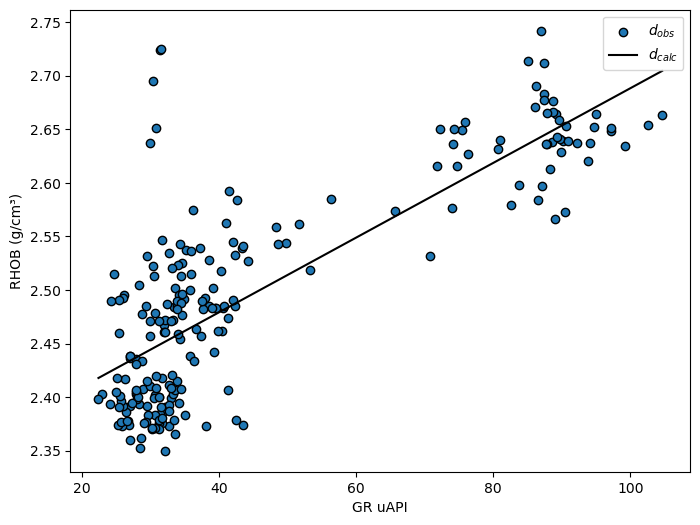

In [11]:
# Faça o scatter plot dos dados observados e dos dados calculados e plote a reta de regressão linear.

plt.figure(figsize=(8,6))
plt.scatter(G[:,1], d,edgecolors='black',label=r'$d_{obs}$')

plt.xlabel('GR uAPI')
plt.ylabel('RHOB (g/cm³)')

X_cresc = np.array([np.ones(len(G)),np.sort(G[:,1])]).T

plt.plot(np.sort(G[:,1]), preditor(X_cresc, w), color='black',label=r'$d_{calc}$')

plt.legend()

-------------

### Questão 2

Considere o modelo de Gardner para estimar a densidade (\(\rho\)) a partir da velocidade sônica (\(v_p\)):

$$
\rho = \alpha v_p^{\beta}.
$$

a) Utilize os dados da perfilagem geofísica do poço *1-MU-0003-BA.LAS* para ajustar uma relação de Gardner por meio do **método dos mínimos quadrados (MMQ)**.

**Dica:** aplique a transformação logarítmica para linearizar a equação antes do ajuste.

b) Proponha um novo modelo a partir dos logs disponíveis.

In [12]:
df = pd.read_csv(r'Dados\Poços\1_MU_0003_BA.csv',delim_whitespace=True)
df.head()

,DEPT,CAL,CILD,CNSS,DT,DRHO,GR,RHOB,ILD,SP
0,190.0,14.063,36.2200,-99999.0,105.1970,-99999.0,43.7010,-99999.0,22.0470,32.1260
1,190.2,14.047,34.6460,-99999.0,99.6060,-99999.0,41.3390,-99999.0,28.0310,32.1260
2,190.4,14.079,31.4960,-99999.0,96.8500,-99999.0,38.7400,-99999.0,29.9210,32.1260
3,190.6,14.126,29.9210,-99999.0,98.8980,-99999.0,37.3230,-99999.0,29.9210,32.4410
4,190.8,14.173,31.4958,-99999.0,100.2361,-99999.0,35.1973,-99999.0,28.3462,32.7561


In [13]:
df = df[df.DT<150]
df = df[df>0].dropna()
df.reset_index(inplace=True,drop=True)
df.tail()

,DEPT,CAL,CILD,CNSS,DT,DRHO,GR,RHOB,ILD,SP
121,726.0,8.7876,387.3945,0.4363,106.9297,0.078,65.9062,2.309,2.5200,48.5040
122,726.2,9.1816,384.2461,0.4382,109.2969,0.142,67.5625,2.307,2.5200,48.5040
123,726.4,9.5750,382.6768,0.4283,111.6540,0.157,69.2130,2.334,2.5200,48.5040
124,726.6,9.1655,379.5234,0.4420,107.3281,0.111,70.8711,2.341,2.5200,48.8193
125,726.8,9.4954,376.3711,0.4401,109.4375,0.124,73.4609,2.285,2.5511,49.1343


In [14]:
df.head()

,DEPT,CAL,CILD,CNSS,DT,DRHO,GR,RHOB,ILD,SP
0,601.0,11.2129,371.6680,0.5421,128.5054,0.053,60.9436,2.215,2.6769,51.6533
1,601.2,11.1649,381.1172,0.5275,129.6067,0.050,59.9985,2.179,2.6459,51.3381
2,601.4,11.1180,390.5508,0.5091,130.0000,0.063,58.8190,2.231,2.5830,50.7090
3,601.6,11.1020,390.5547,0.5076,128.7344,0.075,60.2422,2.253,2.5509,50.0781
4,601.8,11.0870,392.1328,0.4920,126.3780,0.084,62.6055,2.243,2.4880,49.4482


In [15]:
# Convertendo DT de microsegundos/pé para velocidade em m/s
v = np.asarray((0.3048 * (10**6))/df['DT'])
v

array([2371.88476126, 2351.7302732 , 2344.61538462, 2367.66551908,
       2411.8121825 , 2411.72058223, 2355.94202899, 2322.10879171,
       2259.7345405 , 2246.7255523 , 2291.99815918, 2353.02836603,
       2283.74480201, 2224.81751825, 2349.13294798, 2834.31793645,
       3381.38419314, 3921.92184464, 3492.94134769, 3045.14365525,
       2731.23908468, 2435.96403596, 2357.47267791, 2300.10655349,
       2367.66551908, 2434.74787818, 2580.74348781, 2631.51078764,
       2536.66639758, 2526.76187342, 2546.6999431 , 2558.57310862,
       2601.45948022, 2673.32307741, 2682.54838576, 2658.57928245,
       2627.93508793, 2619.0517108 , 2613.59222302, 2548.36500814,
       2546.71483812, 2568.65332787, 2563.54185941, 2580.65827106,
       2589.0495436 , 2474.74710569, 2293.14314088, 2229.8142553 ,
       2281.1434456 , 2357.57843899, 2446.88776428, 2486.16215846,
       2476.6191873 , 2530.1156814 , 2561.68035474, 2457.60074309,
       2404.14193903, 2294.57597772, 2259.87025023, 2291.88958

In [16]:
# Criando a matriz de dados G
G = np.array([np.ones(len(df)),np.log10(v)]).T
G

array([[1.        , 3.37509358],
       [1.        , 3.37138751],
       [1.        , 3.37007161],
       [1.        , 3.37432035],
       [1.        , 3.38234348],
       [1.        , 3.38232699],
       [1.        , 3.3721646 ],
       [1.        , 3.36588256],
       [1.        , 3.35405742],
       [1.        , 3.35155002],
       [1.        , 3.36021426],
       [1.        , 3.37162716],
       [1.        , 3.35864757],
       [1.        , 3.3472944 ],
       [1.        , 3.3709076 ],
       [1.        , 3.45244857],
       [1.        , 3.52909452],
       [1.        , 3.59349893],
       [1.        , 3.54319129],
       [1.        , 3.48360779],
       [1.        , 3.43635972],
       [1.        , 3.38667087],
       [1.        , 3.37244667],
       [1.        , 3.36174796],
       [1.        , 3.37432035],
       [1.        , 3.386454  ],
       [1.        , 3.41174484],
       [1.        , 3.42020515],
       [1.        , 3.40426336],
       [1.        , 3.40256432],
       [1.

In [17]:
# Criando o vetor de dados d
d = np.log10(np.array(df['RHOB']))
d

array([0.34537373, 0.33825723, 0.34849957, 0.35276119, 0.35082927,
       0.34811007, 0.34849957, 0.34004732, 0.33344727, 0.33585891,
       0.35198946, 0.35218252, 0.35295391, 0.35121635, 0.3695498 ,
       0.37730625, 0.3900515 , 0.39287275, 0.38827886, 0.36995761,
       0.3628593 , 0.34419572, 0.33945144, 0.35160307, 0.35755372,
       0.3558345 , 0.36248247, 0.35850591, 0.36417563, 0.36135002,
       0.35717226, 0.3586961 , 0.3628593 , 0.36754227, 0.36567514,
       0.36153897, 0.36642296, 0.36698298, 0.36865871, 0.36903022,
       0.36958689, 0.37051309, 0.36492603, 0.361161  , 0.35640833,
       0.35044186, 0.34537373, 0.3461573 , 0.34693946, 0.35353156,
       0.36097188, 0.35487642, 0.35102285, 0.35736303, 0.36267093,
       0.35276119, 0.34713478, 0.34183006, 0.34123662, 0.3492581 ,
       0.35964579, 0.35755372, 0.35679046, 0.35621713, 0.36002509,
       0.36940141, 0.36977229, 0.3632358 , 0.35717226, 0.34637254,
       0.33505652, 0.32960125, 0.33845649, 0.34908317, 0.34966

In [18]:
w = inversa_generalizada(G, d)
print(f"w0={w[0]}, w1={w[1]}")

print(f"alpha={np.log10(w[0])}, beta={w[1]}")

w0=-0.13276726267130373, w1=0.14361612302404067
alpha=nan, beta=0.14361612302404067


C:\Users\Acer3\AppData\Local\Temp\ipykernel_30340\374716790.py:4: RuntimeWarning: invalid value encountered in log10
  print(f"alpha={np.log10(w[0])}, beta={w[1]}")


In [19]:
# Crie uma função para fazer a predição por Gardner
def preditor_gardner(v, w):
    """
    Função para estimar a densidade (RHOB) a partir da velocidade (v) usando a relação de Gardner.
    
    Parâmetros:
    v : Vetor de velocidades (m/s).
    w : Parâmetros do modelo (w0 e w1).
        
    Retorna:
    rhob_calc : numpy.ndarray
        Densidade prevista (g/cm³).
    """
    rhob_calc = 10**w[0] * (v ** w[1])
    return rhob_calc

In [20]:
# Faça a predição de RHOB
rhob_calc = preditor_gardner(v, w)
rhob_calc

array([2.24879876, 2.24604442, 2.24506726, 2.24822381, 2.25419663,
       2.25418433, 2.24662167, 2.24195939, 2.23320947, 2.23135853,
       2.23776091, 2.24622243, 2.23660185, 2.22822058, 2.245688  ,
       2.30706598, 2.36628805, 2.41722525, 2.37734458, 2.33096086,
       2.29482408, 2.25742473, 2.24683124, 2.23889613, 2.24822381,
       2.25726283, 2.27622036, 2.28259752, 2.27059586, 2.26932048,
       2.27188352, 2.27340166, 2.27883548, 2.28777115, 2.2889033 ,
       2.28595479, 2.28215182, 2.28104229, 2.2803588 , 2.27209678,
       2.27188543, 2.27468582, 2.27403519, 2.27620957, 2.27727104,
       2.26255152, 2.23792142, 2.2289386 , 2.23623579, 2.24684571,
       2.25887578, 2.26404739, 2.26279725, 2.26975282, 2.27379797,
       2.26029347, 2.25316564, 2.23812219, 2.23322873, 2.23774568,
       2.24003863, 2.24273659, 2.24545692, 2.24702872, 2.24880253,
       2.2527912 , 2.25480285, 2.25540832, 2.25540524, 2.25296612,
       2.2381009 , 2.22745524, 2.21844304, 2.21334312, 2.21509

In [21]:
# Estimando o erro quadrático médio (EQM) entre o dado observado e o dado calculado
print(f"EQM = {erro_quadratico_medio(10**d, rhob_calc)} g/cm^3")

EQM = 0.00197686044616408 g/cm^3


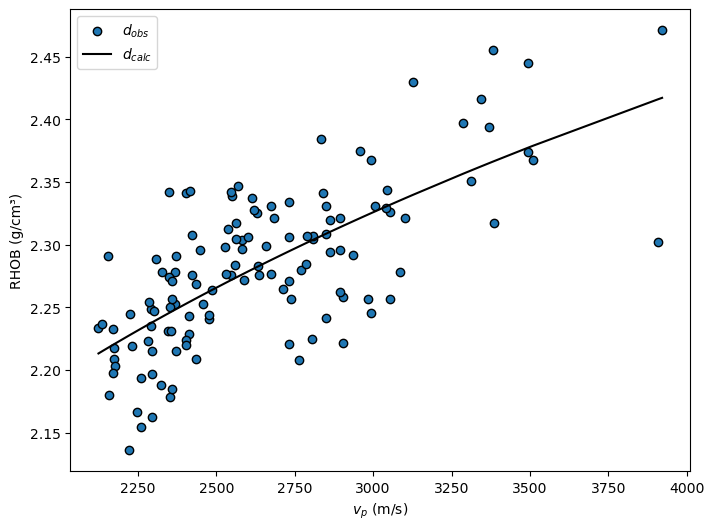

In [22]:
# Faça o scatter plot dos dados observados e dos dados calculados e plote a reta de regressão linear.

plt.figure(figsize=(8,6))

plt.scatter(v, 10**d,edgecolors='black',label=r'$d_{obs}$')

plt.xlabel(r'$v_p$ (m/s)')
plt.ylabel('RHOB (g/cm³)')

vp_cresc = np.sort(v)

plt.plot(np.sort(v), preditor_gardner(np.sort(v), w), color='black',label=r'$d_{calc}$')

plt.legend()



#### Questão

O modelo se ajusta bem? Caso negativo, qual motivo você atribui ao ajuste inadequado?

#### Proponha o seu modelo

#### Bônus

Considere que a solução regularizada utilizando a ivnersa generalizada é dada por:

$$\mathbf{m=(G^TG + \lambda^2 I)^{-1}G^T d}$$

em que lambda é um termo de regularização.

Implemente a solução inversa generalizar utilizando o termo de regularização e refaça o modelo sugerido.

In [23]:
def inversa_generalizada_reg(G, d, lambda_reg=0.1):
    """
    Função para calcular a solução inversa generalizada com regularização.
    
    Parâmetros:
    G : Matriz de dados.
    d : Vetor de dados observados.
    lambda_reg : Termo de regularização.
        
    Retorna:
    w : numpy.ndarray
        Parâmetros do modelo estimados.
    """
    # Calculando a solução inversa generalizada com regularização
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(G.T,G) + lambda_reg**2 * np.eye(G.shape[1])),G.T),d)
    return w

In [32]:
w = inversa_generalizada(G, d)
print(f"w0={w[0]}, w1={w[1]}")

print(f"alpha={10**(w[0])}, beta={w[1]}")

w0=-0.13276726267130373, w1=0.14361612302404067
alpha=0.7366017347735668, beta=0.14361612302404067


In [37]:
w_reg = inversa_generalizada_reg(G, d,lambda_reg=0.1)
print(f"w0={w_reg[0]}, w1={w_reg[1]}")

print(f"alpha={10**(w_reg[0])}, beta={w_reg[1]}")

w0=-0.09584877450666418, w1=0.13281772621264815
alpha=0.8019572639660478, beta=0.13281772621264815


In [38]:
# Faça a predição de RHOB
rhob_calc_reg = preditor_gardner(v, w_reg)

In [39]:
# Estimando o erro quadrático médio (EQM) entre o dado observado e o dado calculado
print(f"EQM = {erro_quadratico_medio(10**d, rhob_calc)} g/cm^3")
print(f"EQM_reg = {erro_quadratico_medio(10**d, rhob_calc_reg)} g/cm^3")

EQM = 0.00197686044616408 g/cm^3
EQM_reg = 0.0019879924662144057 g/cm^3


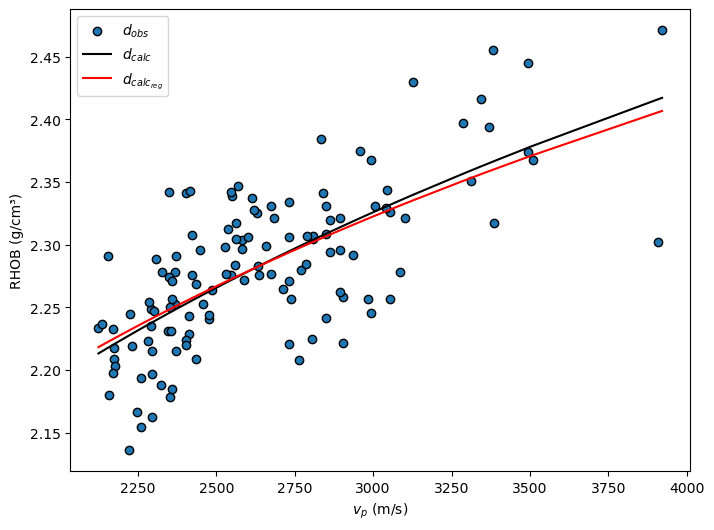

In [40]:
# Faça o scatter plot dos dados observados e dos dados calculados e plote a reta de regressão linear.

plt.figure(figsize=(8,6))

plt.scatter(v, 10**d,edgecolors='black',label=r'$d_{obs}$')

plt.xlabel(r'$v_p$ (m/s)')
plt.ylabel('RHOB (g/cm³)')

vp_cresc = np.sort(v)

plt.plot(np.sort(v), preditor_gardner(np.sort(v), w), color='black',label=r'$d_{calc}$')

plt.plot(np.sort(v), preditor_gardner(np.sort(v), w_reg), color='red',label=r'$d_{calc_{reg}}$')

plt.legend()

